### Import libraries and create data frame

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

# Prepare Data

In [8]:
stroke_df = pd.read_csv("Resources/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Count the Y values for Stroke
counts = stroke_df['stroke'].value_counts()
counts

stroke
0    4861
1     249
Name: count, dtype: int64

In [10]:
# Display the cleaned DataFrame and its data types
display(stroke_df.head())
print(stroke_df.dtypes)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [11]:
print(stroke_df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [12]:
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [13]:
# only 3% of the data is missing bmi data so we drop it
stroke_df = stroke_df.dropna()

# only one row with gender other so we drop it
stroke_df = stroke_df[stroke_df['gender'] != 'Other']

### Split into X and y

In [14]:
X = stroke_df.drop(columns=['id', 'stroke'])
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [15]:
y = stroke_df['stroke']

### Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [17]:
X_train.isna().sum()/len(stroke_df)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
dtype: float64

In [18]:
(X_train['smoking_status'] == 'Unknown').sum()/len(stroke_df)

0.22432762836185818

In [19]:
X_train.loc[X_train['smoking_status'] == 'Unknown'].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,29.758946,0.024523,0.028156,98.191499,25.713715
std,24.718526,0.154737,0.165494,35.406038,7.952527
min,0.080000,0.000000,0.000000,55.230000,11.300000
25%,8.000000,0.000000,0.000000,76.110000,19.500000
50%,23.000000,0.000000,0.000000,89.280000,24.600000
75%,50.000000,0.000000,0.000000,109.560000,30.200000
max,82.000000,1.000000,1.000000,254.600000,61.200000


In [20]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000
mean,43.019723,0.089378,0.052703,104.820277,29.023200
std,22.433095,0.285327,0.223470,44.210654,7.814099
min,0.080000,0.000000,0.000000,55.120000,11.300000
25%,25.000000,0.000000,0.000000,76.560000,23.800000
50%,45.000000,0.000000,0.000000,91.540000,28.200000
75%,60.000000,0.000000,0.000000,112.770000,33.300000
max,82.000000,1.000000,1.000000,271.740000,92.000000


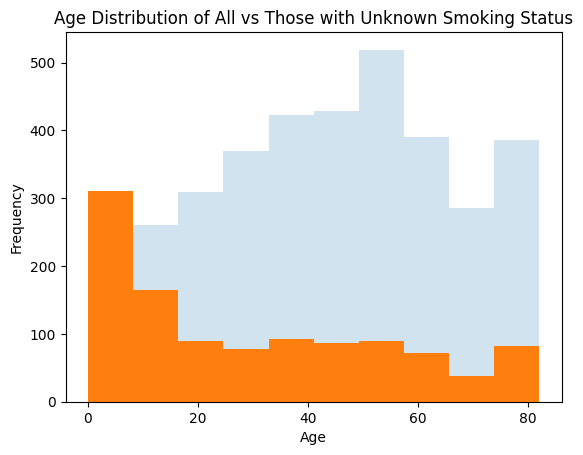

In [21]:
#create a histogram to see if a specific age group is more respresented in the unknown smoking status rows

X_train['age'].plot(kind='hist',alpha=0.2)
X_train.loc[stroke_df['smoking_status'] == 'Unknown', 'age'].plot(kind='hist')
plt.title('Age Distribution of All vs Those with Unknown Smoking Status')
plt.xlabel('Age')
plt.savefig('age_distribution_plot.png')


In [22]:
# We will assume most of the unknown values below the legal smoking age fall into the never smoked category
for index, row in X_train.iterrows():
    if row['age'] <= 18:
        X_train.at[index, 'smoking_status'] = 'never smoked'
# checking how many unknowns we have left
(X_train['smoking_status'] == 'Unknown').sum()/len(stroke_df)

0.12082314588427058

In [23]:
'''
# checking all columns's different values 
for x in stroke_df:
    display(stroke_df[x].value_counts())
'''

"\n# checking all columns's different values \nfor x in stroke_df:\n    display(stroke_df[x].value_counts())\n"

### Scale The Data

In [24]:
# scaling our numeric data
scaler = StandardScaler()
col_scale = ['age', 'bmi', 'avg_glucose_level']
#Fit the scaler to the columnsint he training set
X_train[col_scale]=scaler.fit_transform(X_train[col_scale])
#Transform
X_test[col_scale]=scaler.fit_transform(X_test[col_scale])


In [25]:
# display our dataset
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
271,Female,0.266619,0,0,Yes,Private,Rural,-1.008950,0.317009,smokes
2604,Male,0.757033,0,0,Yes,Private,Rural,-0.383676,-0.002969,formerly smoked
4894,Female,-0.402127,0,0,No,Govt_job,Urban,-0.570535,2.211278,never smoked
1372,Male,-0.090045,0,0,Yes,Private,Rural,-0.068551,-0.297349,Unknown
3894,Female,-1.892984,0,0,No,children,Urban,-0.540673,-1.372475,never smoked


## Encode the dataset

In [26]:
#encode# List 
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type']

#Encoding with pd.get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

#Check the data
X_train_encoded.head()
#X_train_encoded.isna().sum()/len(stroke_df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
271,0.266619,0,0,-1.008950,0.317009,smokes,False,True,False,True,False,False,False
2604,0.757033,0,0,-0.383676,-0.002969,formerly smoked,True,True,False,True,False,False,False
4894,-0.402127,0,0,-0.570535,2.211278,never smoked,False,False,False,False,False,False,True
1372,-0.090045,0,0,-0.068551,-0.297349,Unknown,True,True,False,True,False,False,False
3894,-1.892984,0,0,-0.540673,-1.372475,never smoked,False,False,False,False,False,True,True


In [27]:
# Create an encoder for the backpack_color column
smoke_ord_enc = OrdinalEncoder(categories = [['smokes','formerly smoked','never smoked']],encoded_missing_value = -1,
                               handle_unknown = 'use_encoded_value', unknown_value = -1) 
#PUT CATEGORIES IN ORDER LOWEST TO HIGHEST ORDER

# Train the encoder
smoke_ord_enc.fit(X_train['smoking_status'].values.reshape(-1,1))

OrdinalEncoder(categories=[['smokes', 'formerly smoked', 'never smoked']],
               encoded_missing_value=-1, handle_unknown='use_encoded_value',
               unknown_value=-1)

In [28]:
# add our ordinal encoded data to new columns in our dataset
X_train_encoded['smoking_status_ordinal'] = smoke_ord_enc.fit_transform(X_train_encoded['smoking_status'].values.reshape(-1,1))
X_test_encoded['smoking_status_ordinal'] = smoke_ord_enc.fit_transform(X_test_encoded['smoking_status'].values.reshape(-1,1))

In [29]:
X_test_encoded.tail()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_ordinal
4407,-0.367270,0,0,-0.796267,3.415455,formerly smoked,False,False,False,True,False,False,True,1.0
2107,0.418234,1,0,1.409863,-0.164376,formerly smoked,False,False,False,True,False,False,False,1.0
2228,0.243678,1,0,1.738063,-0.302545,never smoked,True,True,False,True,False,False,True,2.0
998,-0.585466,0,0,-0.734091,-0.943146,Unknown,False,False,False,True,False,False,True,-1.0
1877,-1.720084,0,0,-0.640828,-1.282288,Unknown,False,False,False,False,False,True,False,-1.0


In [30]:
# remove non-encoded smoking status columns from our data
X_train_encoded = X_train_encoded.drop(['smoking_status'], axis=1)
X_test_encoded = X_test_encoded.drop(['smoking_status'], axis=1)

In [31]:
X_test_encoded.tail(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_ordinal
1305,0.069121,0,0,-0.427209,-0.239740,True,True,False,False,False,False,False,2.0
4083,0.112760,0,0,-0.310186,-0.779855,False,True,False,False,True,False,True,-1.0
1495,-0.061796,0,0,-0.052600,0.212449,False,True,False,True,False,False,False,2.0
509,-0.149074,0,0,-0.487165,0.903293,False,True,False,True,False,False,False,2.0
4722,1.552852,1,0,1.013715,0.413422,False,True,False,False,True,False,False,2.0
4407,-0.367270,0,0,-0.796267,3.415455,False,False,False,True,False,False,True,1.0
2107,0.418234,1,0,1.409863,-0.164376,False,False,False,True,False,False,False,1.0
2228,0.243678,1,0,1.738063,-0.302545,True,True,False,True,False,False,True,2.0
998,-0.585466,0,0,-0.734091,-0.943146,False,False,False,True,False,False,True,-1.0
1877,-1.720084,0,0,-0.640828,-1.282288,False,False,False,False,False,True,False,-1.0


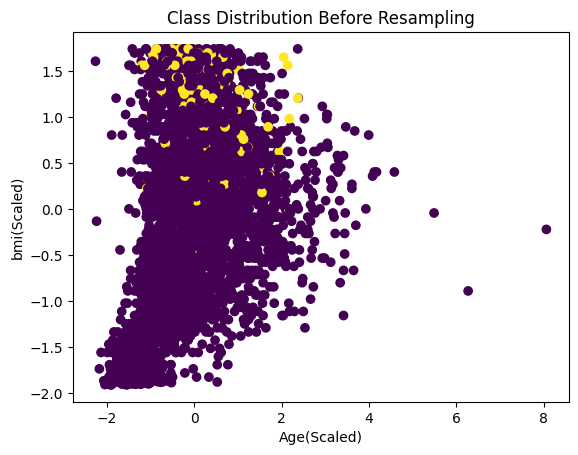

In [32]:
# plotting our distribution of classes before resampling
plt.scatter(
    x=X_train_encoded['bmi'],
    y=X_train_encoded['age'],
    c=y_train)
plt.title('Class Distribution Before Resampling')
plt.ylabel('bmi(Scaled)')
plt.xlabel('Age(Scaled)')
plt.savefig('before_resampling.png')
plt.show()

# SMOTE

In [33]:
# Instantiate and fit SMOTE resampler instance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)


In [34]:
y_train_resampled.value_counts()

stroke
0    3530
1    3530
Name: count, dtype: int64

### Logistic Regression

In [35]:
# Instantiate an initial logistic regression instance
lr_model = LogisticRegression(random_state = 42)

# Fit the initial model based the training data
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict y data
y_pred_lr = lr_model.predict(X_test_encoded)

In [36]:
print(classification_report(y_test, y_pred_lr))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_lr),3)}")

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1169
           1       0.12      0.71      0.20        58

    accuracy                           0.74      1227
   macro avg       0.55      0.72      0.52      1227
weighted avg       0.94      0.74      0.81      1227

balanced accuracy score: 0.723


In [37]:
#make a param grid for our logistic regression model
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],               
    'solver': ['liblinear', 'saga'],      
    'max_iter': [100, 200, 300]           
}

In [38]:
# prepare a grid search to find best params for out logistic regression model
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, 
                           scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/a

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='balanced_accuracy')

In [39]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Balanced Accuracy Score: {best_score}")

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Balanced Accuracy Score: 0.7736543909348443


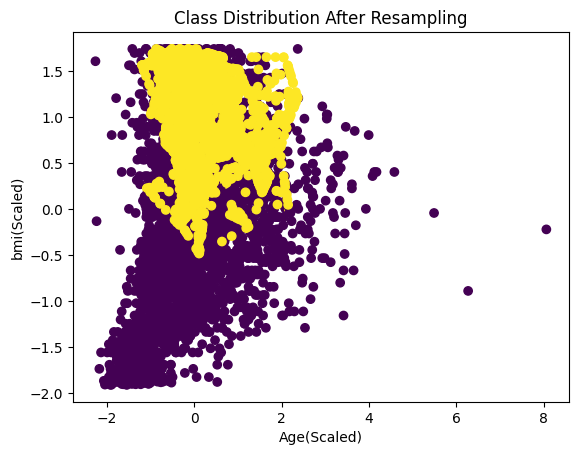

In [40]:
# plotting our distribution of classes after resampling
plt.scatter(
    x=X_train_resampled['bmi'],
    y=X_train_resampled['age'],
    c=y_train_resampled)
plt.title('Class Distribution After Resampling')
plt.ylabel('bmi(Scaled)')
plt.xlabel('Age(Scaled)')
plt.savefig('after_resampling.png')
plt.show()

### AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train_resampled, y_train_resampled)
y_pred_ada = ada_model.predict(X_test_encoded)

/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [42]:
print(classification_report(y_test, y_pred_ada))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_ada),3)}")

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1169
           1       0.12      0.72      0.20        58

    accuracy                           0.73      1227
   macro avg       0.55      0.73      0.52      1227
weighted avg       0.94      0.73      0.81      1227

balanced accuracy score: 0.728


In [43]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],  
    'learning_rate': [0.01, 0.1, 1.0] 
}

In [44]:
# Perform the grid search 
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, 
                           scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='balanced_accuracy')

In [45]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Balanced Accuracy Score: {best_score}")

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 300}
Best Cross-Validation Balanced Accuracy Score: 0.8490084985835693
